In [1]:
using PlotIter
using Plots

gr(; fmt=:png)  # SVG doesn't render nicely on GitHub preview

Plots.GRBackend()

# Using `plot_iter`

In [2]:
# Our x-values for plotting.
x = 1.0:0.01:4*pi

# We'd like to make one plot for each of these.
things = [
    (; title="A", w=1),
    (; title="B", w=2),
    (; title="C", w=3),
    (; title="D", w=4),
    (; title="E", w=5),
];

We can iterate over `things`, and make a plot for each `thing`.
By default, we'll make a row of three plots across.
The width of the row is optimised for the default Jupyter notebook width.

Note that within the `do` block, one should always write to the "current" plot; i.e. use mutating plotting commands like `plot!`.

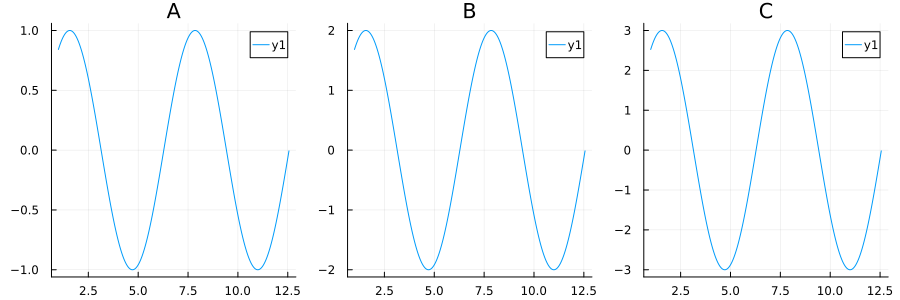

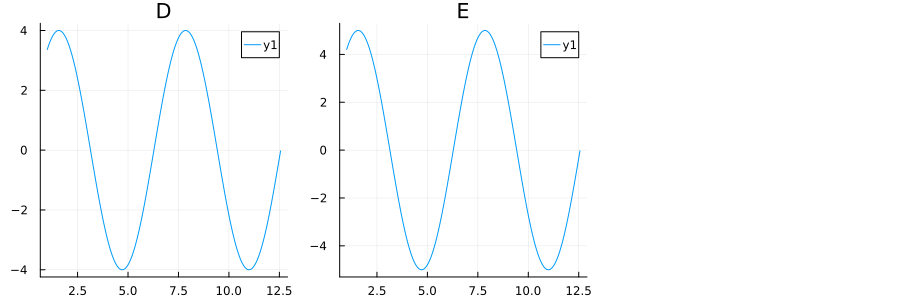

In [3]:
plot_iter(things) do thing
    plot!(x, sin.(x) .* thing.w; title=thing.title)
end;

## Matching axis limits
If you'd like the plots to share the same axis limits, use the `xlims_convex_hull`, `ylims_convex_hull`, or `zlims_convex_hull` keyword arguments.

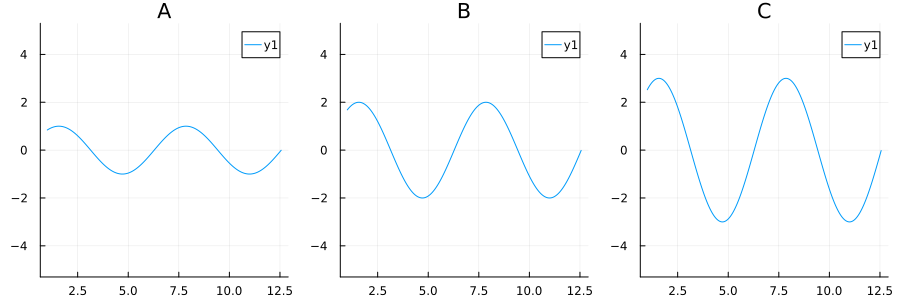

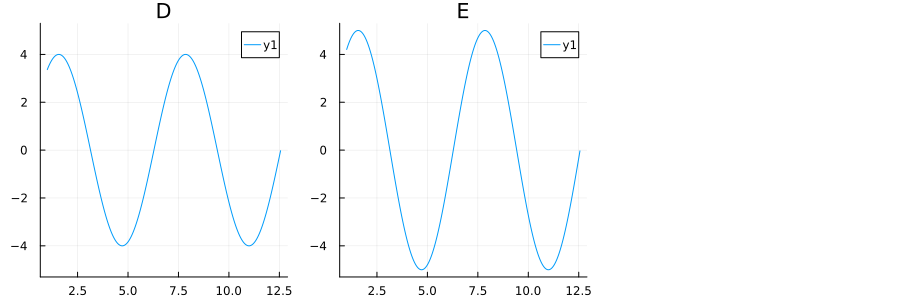

In [4]:
plot_iter(things; ylims_convex_hull=true) do thing
    plot!(x, sin.(x) .* thing.w; title=thing.title)
end;

## Columns, row height
Change the number of columns and row height with `num_cols` and `row_height`, respectively.

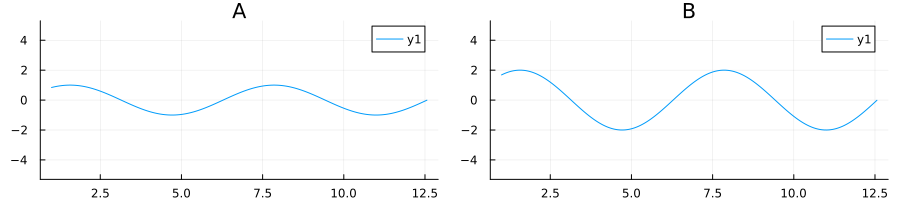

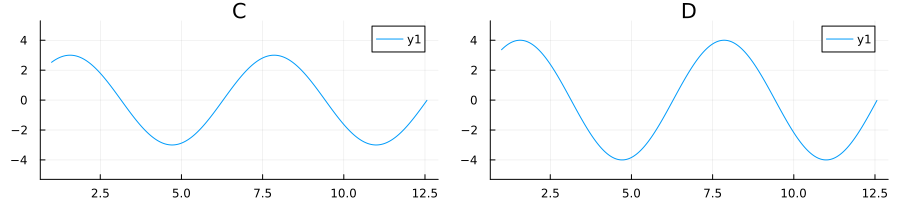

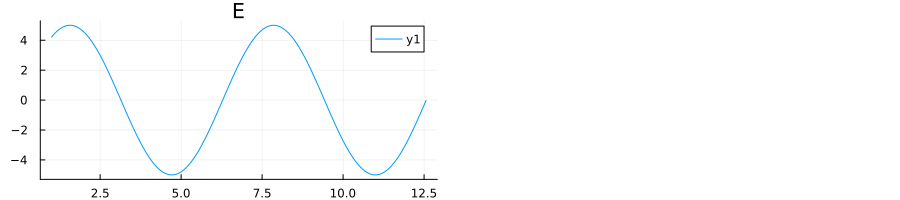

In [5]:
plot_iter(things; ylims_convex_hull=true, num_cols=2, row_height=200) do thing
    plot!(x, sin.(x) .* thing.w; title=thing.title)
end;

## Matching color scale
Using the `clims_convex_hull` argument makes sense if trying to compare heatmaps or 2D histograms:

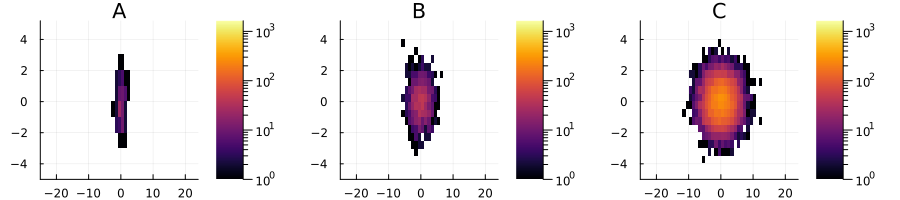

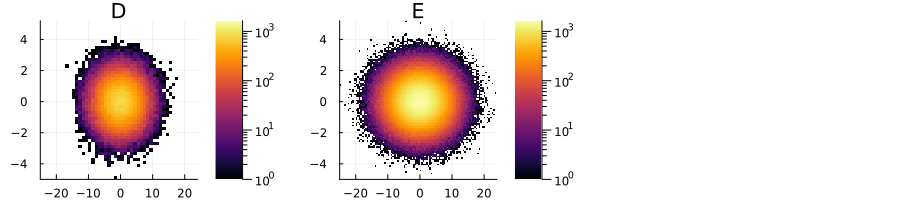

In [6]:
plot_iter(
        things;
        row_height=200,
        xlims_convex_hull=true, ylims_convex_hull=true, clims_convex_hull=true,
    ) do thing
    n = 10^(1 + thing.w)
    x = randn(Float64, n)
    y = randn(Float64, n)
    histogram2d!(x .* thing.w, y; title=thing.title, colorbar_scale=:log10)
end;

# Using `*lims_convex_hull!`
The axis-limit-matching functionality of `plot_iter` can also be used standalone.

Start from plots with different axis ranges:

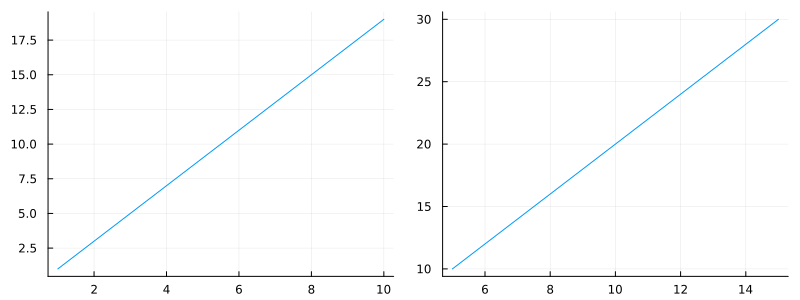

In [7]:
p1 = plot(1:10, 1:2:20)
p2 = plot(5:15, 10:2:30)
plot(p1, p2; size=(800, 300), legend=false)

The x-axis limit can be modified on them to match:

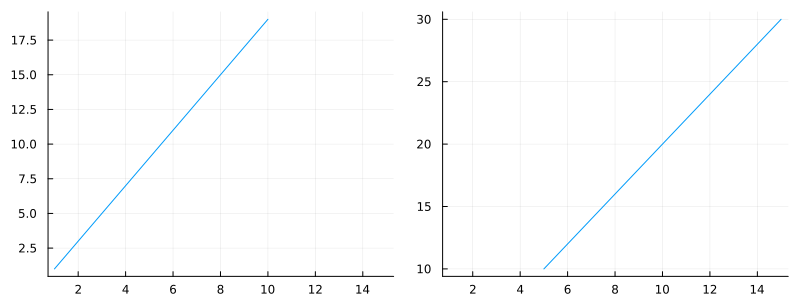

In [8]:
xlims_convex_hull!(p1, p2)

plot(p1, p2; size=(800, 300), legend=false)

and similarly with the y-axis limit:

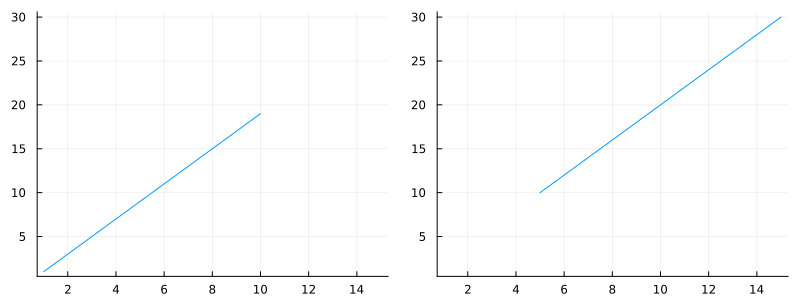

In [9]:
ylims_convex_hull!(p1, p2)

plot(p1, p2; size=(800, 300), legend=false)

This also works for the z-axis, when working with 3D plots, using `zlims_convex_hull!`.
(This is using an adapted version of [this example](https://docs.juliaplots.org/latest/gallery/gr/generated/gr-ref24/) from Plots.jl )

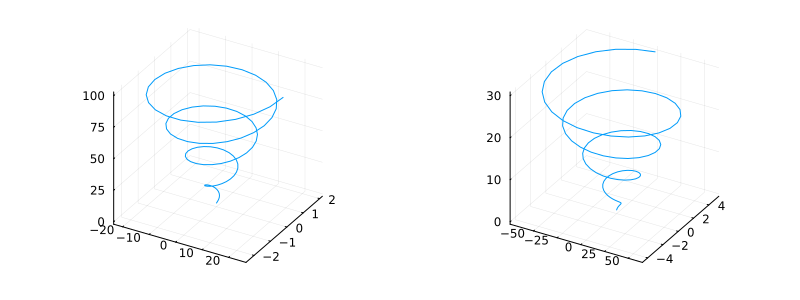

In [10]:
n = 100
ts = range(0, stop=8π, length=n)
x = ts .* map(cos, ts)
y = (0.1ts) .* map(sin, ts)
z = 1:n
p1 = plot(x, y, z)

x2 = 3 .* ts .* map(sin, ts)
y2 = 0.2 .* ts .* map(cos, ts)
z2 = 0.3 .* z
p2 = plot(x2, y2, z2)

plot(p1, p2; size=(800, 300), legend=false)

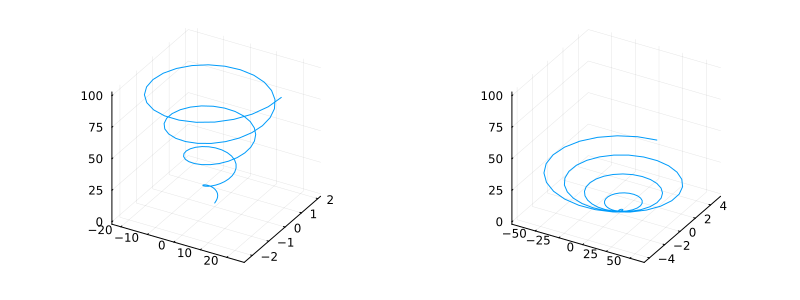

In [11]:
zlims_convex_hull!(p1, p2)
plot(p1, p2; size=(800, 300), legend=false)

Finally, this also works for the colorbar axis, using `clims_convex_hull!`.

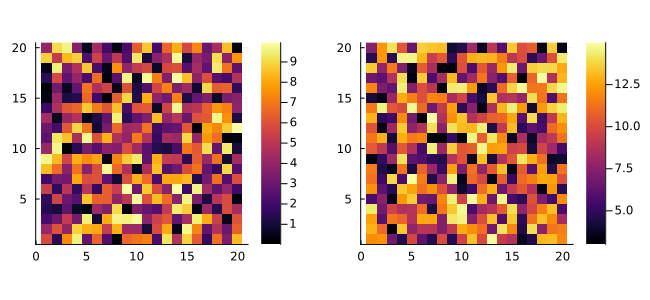

In [12]:
hm1 = heatmap(10 .* rand(20, 20))
hm2 = heatmap(3 .+ 12 .* rand(20, 20))
plot(hm1, hm2; aspect_ratio=:equal, size=(650, 300))

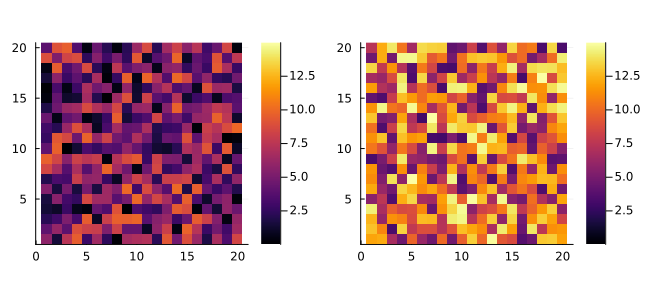

In [13]:
clims_convex_hull!(hm1, hm2)
plot(hm1, hm2; aspect_ratio=:equal, size=(650, 300))